#### Problem Statement

Financial fraud is a critical issue that can lead to significant losses for financial companies and their customers. Accurate prediction of fraudulent transactions can help in preventing these losses by enabling timely intervention.

Develop a model to predict fraudulent transactions for a financial company and use the insights from this model to formulate an actionable plan to mitigate fraud.




**Dataset Link :** [link text](https://drive.google.com/file/d/16jQVtEaFzh_EPeGCMcxK4TlD3_q6uIRh/view?usp=sharing)

https://drive.google.com/file/d/16jQVtEaFzh_EPeGCMcxK4TlD3_q6uIRh/view?usp=sharing

## ***1. Know Your Data***

#### Import Libraries and loading the dataset.

In [ ]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('Fraud.csv')

#### Dataset First View

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dimension of the dataset
rows    = df.shape[0]
columns = df.shape[1]

print(f'Rows : {rows}')
print(f'Columns : {columns}')

Rows : 6362620
Columns : 11


### Dataset Information


- **step**: Maps a unit of time in the real world; 1 step equals 1 hour. The dataset covers 744 steps (30 days).
- **type**: Type of transaction - can be CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER.
- **amount**: Amount of the transaction in local currency.
- **nameOrig**: Customer who initiated the transaction.
- **oldbalanceOrg**: Initial balance of the originator before the transaction.
- **newbalanceOrig**: New balance of the originator after the transaction.
- **nameDest**: Customer who is the recipient of the transaction.
- **oldbalanceDest**: Initial balance of the recipient before the transaction. (Note: Information is not available for merchants, identified by names starting with 'M'.)
- **newbalanceDest**: New balance of the recipient after the transaction. (Note: Information is not available for merchants, identified by names starting with 'M'.)
- **isFraud**: Indicates whether the transaction is fraudulent. Fraudulent behavior involves agents taking control of customer accounts to transfer and cash out funds.
- **isFlaggedFraud**: Indicates transactions flagged for illegal attempts (e.g., transferring more than 200,000 in a single transaction).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Duplicate Values

In [ ]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- Here, we have null values in the columns nameOrig, oldbalanceOrg, newbalanceOrg, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud.

<Axes: >

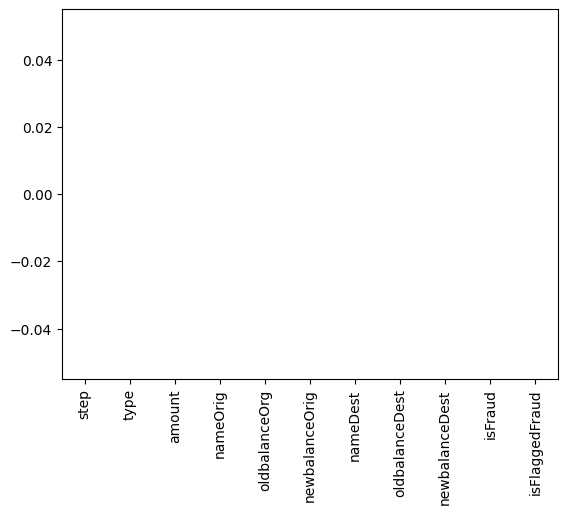

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot(kind = 'bar')

- In  6326491 records , there is only 1 record which contain null values.
- So, we will simply remove the null values.

In [ ]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


- Basically the last record contain Nan values.

In [ ]:
# Dropping the record which contain null values
df.dropna(inplace = True)

In [ ]:
# Verifying whether the dataset contain any further null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Taking the 5-number summery of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


- There is much difference between the mean and median amount of transaction.

In [ ]:
# Taking the 5-number summery of numerical data for Fradulant Transaction

df[df['isFraud']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
step,8213.0,3.684139e+02,2.163887e+02,1.0,181.00,367.00,558.00,7.430000e+02
amount,8213.0,1.467967e+06,2.404253e+06,0.0,127091.33,441423.44,1517771.48,1.000000e+07
oldbalanceOrg,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,5.958504e+07
newbalanceOrig,8213.0,1.923926e+05,1.965666e+06,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,8213.0,5.442496e+05,3.336421e+06,0.0,0.00,0.00,147828.66,2.362305e+08
newbalanceDest,8213.0,1.279708e+06,3.908817e+06,0.0,0.00,4676.42,1058725.22,2.367265e+08
isFraud,8213.0,1.000000e+00,0.000000e+00,1.0,1.00,1.00,1.00,1.000000e+00
isFlaggedFraud,8213.0,1.948131e-03,4.409731e-02,0.0,0.00,0.00,0.00,1.000000e+00


In [ ]:
 min

<function min>

In [ ]:
# Taking the 5-number summery of numerical data for Non-Fradulant Transaction
df[df['isFraud']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
step,6354407.0,2.432357e+02,1.421402e+02,1.00,156.000,239.00,334.000,7.180000e+02
amount,6354407.0,1.781970e+05,5.962370e+05,0.01,13368.395,74684.72,208364.760,9.244552e+07
oldbalanceOrg,6354407.0,8.328287e+05,2.887144e+06,0.00,0.000,14069.00,106969.500,4.381886e+07
newbalanceOrig,6354407.0,8.559702e+05,2.924987e+06,0.00,0.000,0.00,144730.740,4.368662e+07
oldbalanceDest,6354407.0,1.101421e+06,3.399202e+06,0.00,0.000,133311.80,944144.580,3.560159e+08
newbalanceDest,6354407.0,1.224926e+06,3.673816e+06,0.00,0.000,214881.70,1111975.345,3.561793e+08
isFraud,6354407.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.000000e+00
isFlaggedFraud,6354407.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.000000e+00


We can see that,

- Out of 6326490 records, there are only 8213 record of fraud. This indicates that our dataset is highly imbalanced.


- In case of Fraud_transaction, there is huge difference in mean and median amount when compared with difference between mean & median amount of Non_fraud Transaction.

- Also, there is huge difference in the standard deviation of fradualant transaction and non-fradulant transaction.



### Check Unique Values for each variable.

In [ ]:
for column in df.columns:
  print(f'Unique Values in columns {column} is {df[column].nunique()} ')
  print()


Unique Values in columns step is 743 

Unique Values in columns type is 5 

Unique Values in columns amount is 5316900 

Unique Values in columns nameOrig is 6353307 

Unique Values in columns oldbalanceOrg is 1845844 

Unique Values in columns newbalanceOrig is 2682586 

Unique Values in columns nameDest is 2722362 

Unique Values in columns oldbalanceDest is 3614697 

Unique Values in columns newbalanceDest is 3555499 

Unique Values in columns isFraud is 2 

Unique Values in columns isFlaggedFraud is 2 



- **Categorical Varibles** : type, nameOrig, nameDest
- **Numerical Variables with continuous values** : amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

- **Numerical Varibles with Disrete values** : step, isFlaggedFraud
- **Target variable** : isFraud

In [ ]:
# Lets check the unique values in Categical variables, Numerical Varibles with Disrete values & Target Variables.

# unique values in 'step'
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [ ]:
# unique values in 'nameOrig'
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [ ]:
# unique values in 'nameDest'
df['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [ ]:
# unique values in 'isFlaggedFraud'
df['isFlaggedFraud'].unique()

array([0, 1])

In [ ]:
# unique values in Target Variable 'isFraud'
df['isFraud'].unique()

array([0, 1])

##**3.  Data Wrangling Code**

In [ ]:
# Checking the datatype of all variable and changing themif possible
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int')
df['isFraud'] = df['isFraud'].astype('int')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# sns.pairplot(df, hue = 'isFraud')

In [ ]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type'>

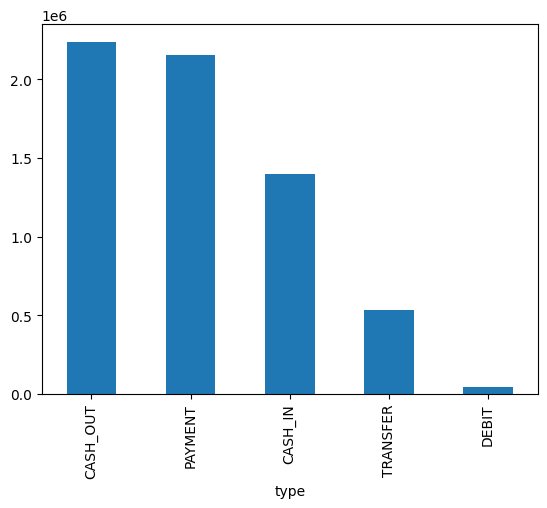

In [ ]:
df['type'].value_counts().plot(kind = 'bar')


- We can see than PAYMENT & CASH_OUT type trasaction are maximum which is followed by CASH_IN type.

- There are very few DEBIT type of transaction.

#### Chart -2

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: ylabel='count'>

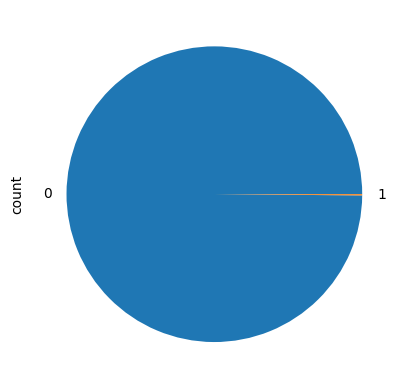

In [ ]:
df['isFraud'].value_counts().plot(kind = 'pie')

- From the above piechart, we can see that there is less than 1% of the total transaction are fradualnt transaction.

- This indicates that , dataset is hightly imbalanced.

#### Chart - 3

<Axes: xlabel='amount', ylabel='Density'>

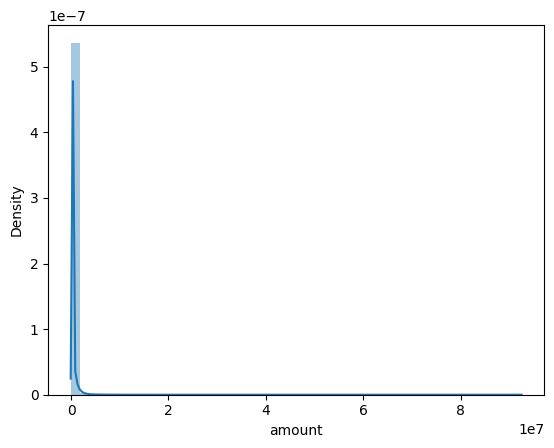

In [ ]:
# Distribution of the numerical variables

sns.distplot( df['amount'] )

<Axes: xlabel='amount', ylabel='Count'>

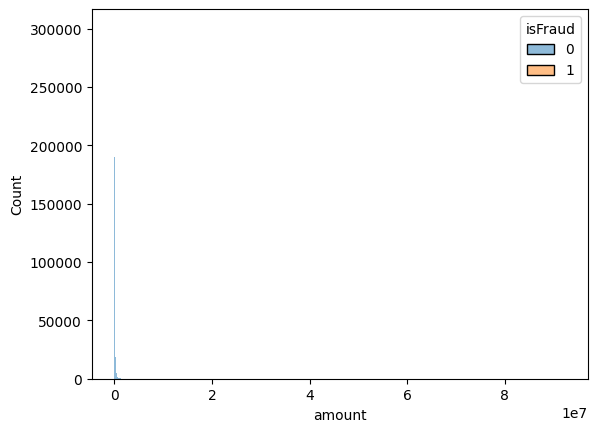

In [ ]:
# Distribution of the numerical variables 'amount'
sns.histplot( x = df['amount'], hue = df['isFraud'] )

- Generally, maximum number of transaction are      below 100000

<Axes: xlabel='amount', ylabel='Count'>

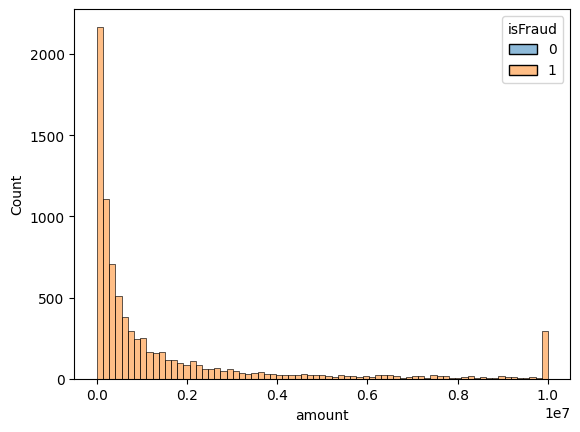

In [ ]:
sns.histplot( x = df[df['isFraud']==1]['amount'], hue = df['isFraud'] )

- From the above graph, we can see that there is significant number of fradulant transactions where amount is around 1cr.

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

#### Chart - 4

In [ ]:
# Count of fraudulent Transaction with respect to Trasaction Type
crosstab_with_margins = pd.crosstab(df['type'], df['isFraud']  )
crosstab_with_margins

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


- We can see that , almost equal number of fraudulent transaction are found in CASH_OUT & TRANSFER type of transaction only.

- There is fraudulent transaction done by CASH_IN , DEBIT, PAYMENT.

#### Chart - 5

In [ ]:
 # How mmany fraudulent transaction are detected correctly

 crosstab_with_fraud_and_isflagged = pd.crosstab( df['isFraud'], df['isFlaggedFraud'])
 crosstab_with_fraud_and_isflagged

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


- Out of 8213 Fraudulent Trasactions, only 16 transactions were correctly detected as fraud.

#### Chart - 6

In [ ]:
df['nameOrig']

0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: object

In [ ]:
df['nameDest']

0          M1979787155
1          M2044282225
2           C553264065
3            C38997010
4          M1230701703
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 6362620, dtype: object

In [ ]:
# Function to extract the Initial of the nameOrig & nameDest
df['nameOrig_initial'] = df['nameOrig'].apply(lambda x : x[0])
df['nameDest_initial'] = df['nameDest'].apply(lambda x : x[0])


# Replaciing the ['C'] with 'Customer'.
df['nameOrig_initial'] = df['nameOrig_initial'].map({'C' : "Customer"})

# Replaciing the ['M', 'C'] with 'Merchant' & 'Customer'.
df['nameDest_initial'] = df['nameDest_initial'].map({'C' : "Customer", 'M': 'Merchant'})


In [ ]:
# Analysising the Count of Customer-->Customer & Customer-->Merchant Transaction
crosstab_CC_and_CM_transaction  = pd.crosstab( df['nameOrig_initial'],df['nameDest_initial'])
crosstab_CC_and_CM_transaction

nameDest_initial,Customer,Merchant
nameOrig_initial,,
Customer,4211125,2151495


In [ ]:
# Analysising the Count of Customer-->Customer & Customer-->Merchant Transaction  for Fraudulent Transaction
crosstab_CC_and_CM_transaction  = pd.crosstab( df[df['isFraud']==1]['nameOrig_initial'], df[df['isFraud']==1]['nameDest_initial'])
crosstab_CC_and_CM_transaction

nameDest_initial,Customer
nameOrig_initial,
Customer,8213


- We can conclude that, out of total transaction almost 2/3 the number of transaction are between Customer-->Customer & rest 1/3 transactions are between Customer-->Merchant.

- But all the 8200 Fraudulent transactiion where in between Customer-->Customer only.

#### Chart - 7

<Axes: xlabel='step', ylabel='count'>

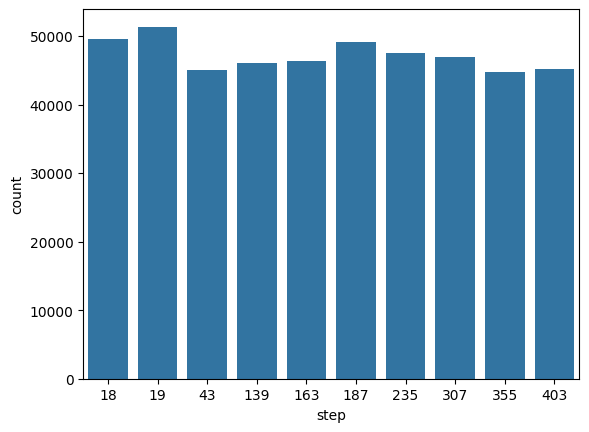

In [ ]:
# Top 10 step which maximum number of transaction
step_transaction  = df['step'].value_counts().reset_index().head(10)
sns.barplot(x = step_transaction['step'], y = step_transaction['count'])

<Axes: xlabel='step', ylabel='count'>

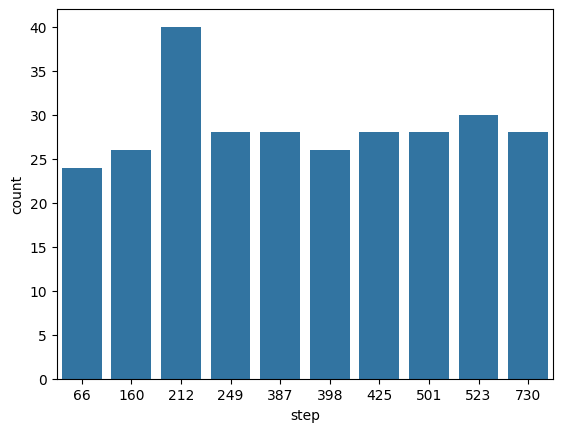

In [ ]:
# Top 10 step which maximum number of Fraudulent transaction
step_fraudulent_transaction  = df[df['isFraud']==1]['step'].value_counts().reset_index().head(10)
sns.barplot(x = step_fraudulent_transaction['step'], y = step_fraudulent_transaction['count'])

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'nameOrig_initial', 'nameDest_initial'],
      dtype='object')

#### Chart - 8

<Axes: >

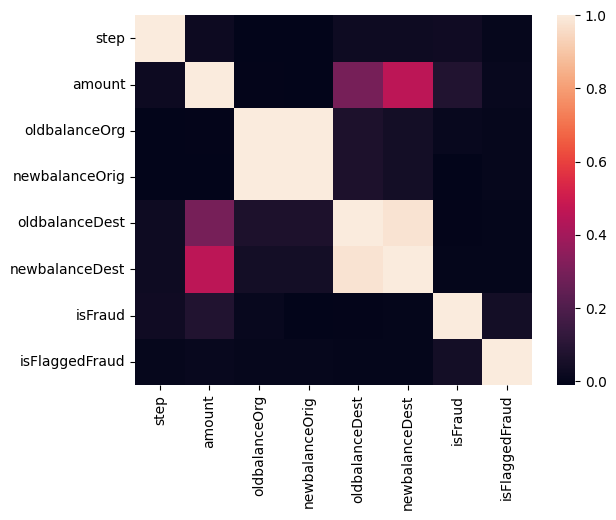

In [ ]:
numerical_columns = [ 'step',   'amount',  'oldbalanceOrg', 'newbalanceOrig',
                      'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

sns.heatmap( df[numerical_columns].corr())

In [ ]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_initial,nameDest_initial
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,Customer,Customer
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,Customer,Customer
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,Customer,Customer
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,Customer,Customer
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,Customer,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,Customer,Customer
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,Customer,Customer
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,Customer,Customer
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,Customer,Customer


#### Chart - 9

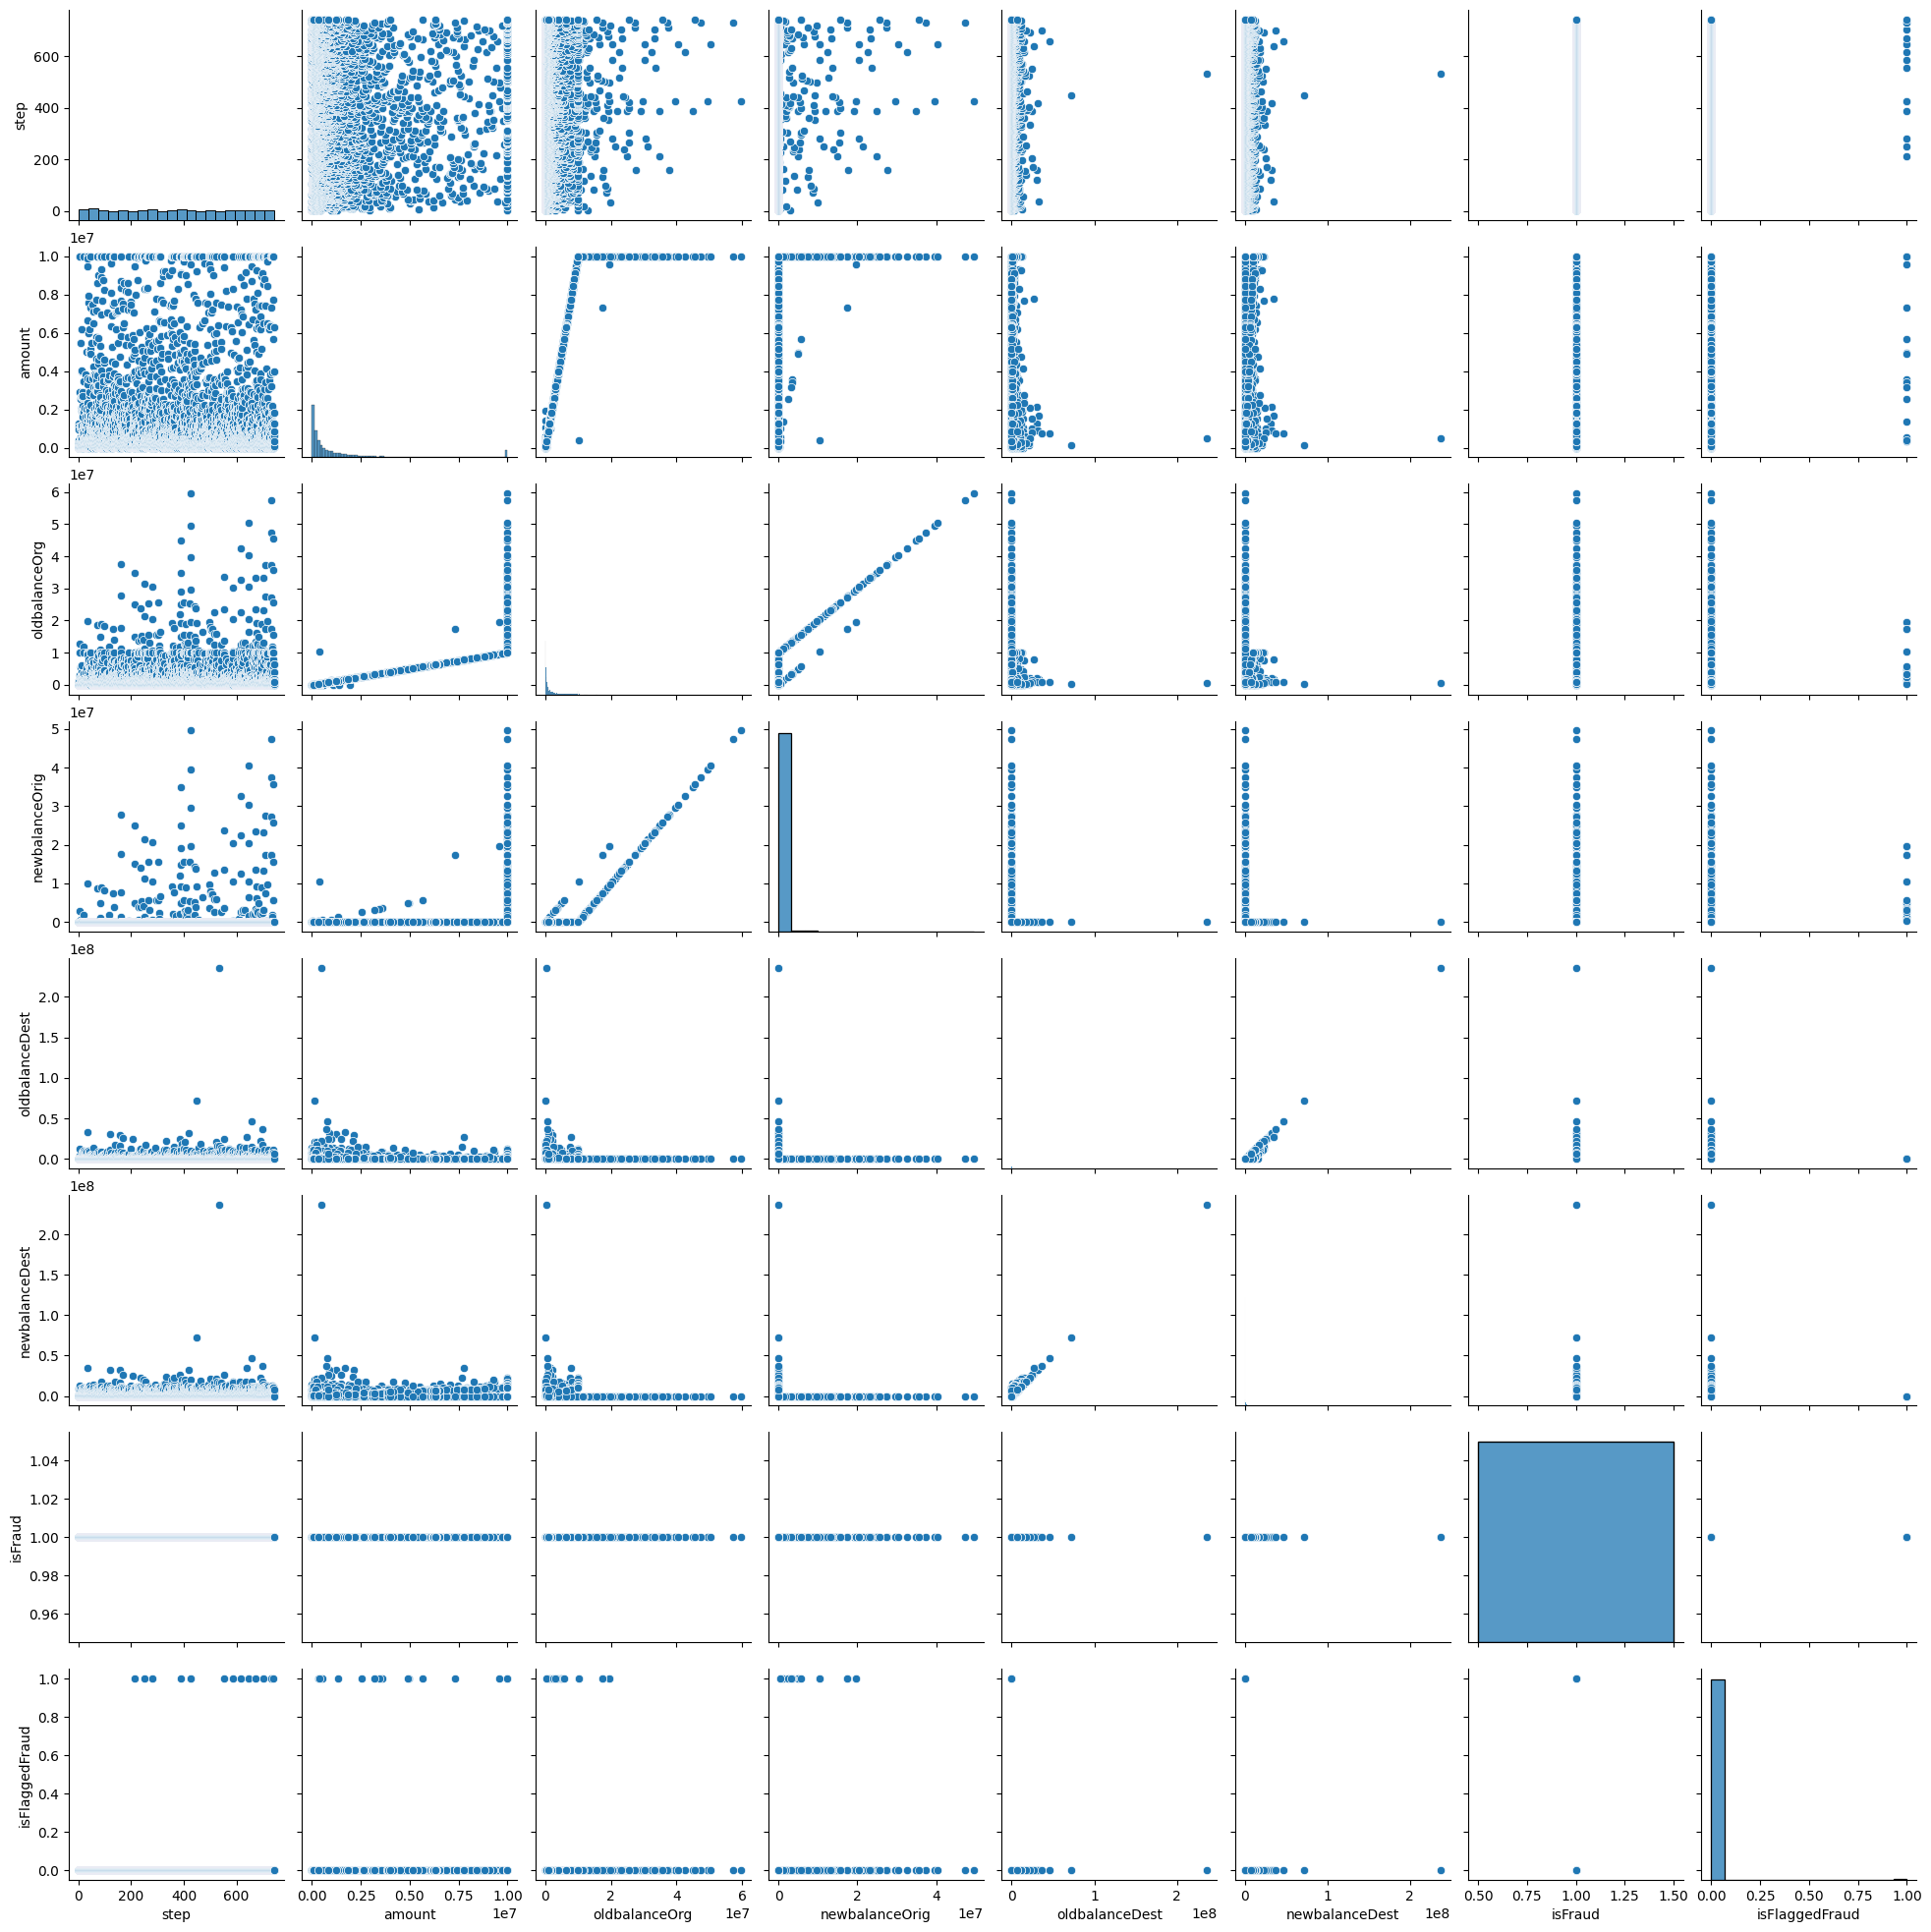

In [ ]:
# pairplot for the records of Fraudulent Transaction

sns.pairplot( df[df['isFraud']==1] )

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

- There is only one records which contain Nan value.
- Removing one record out of 6362620 records will not cause any loss of data.
-Hence, we removed it.

### 2. Handling Outliers

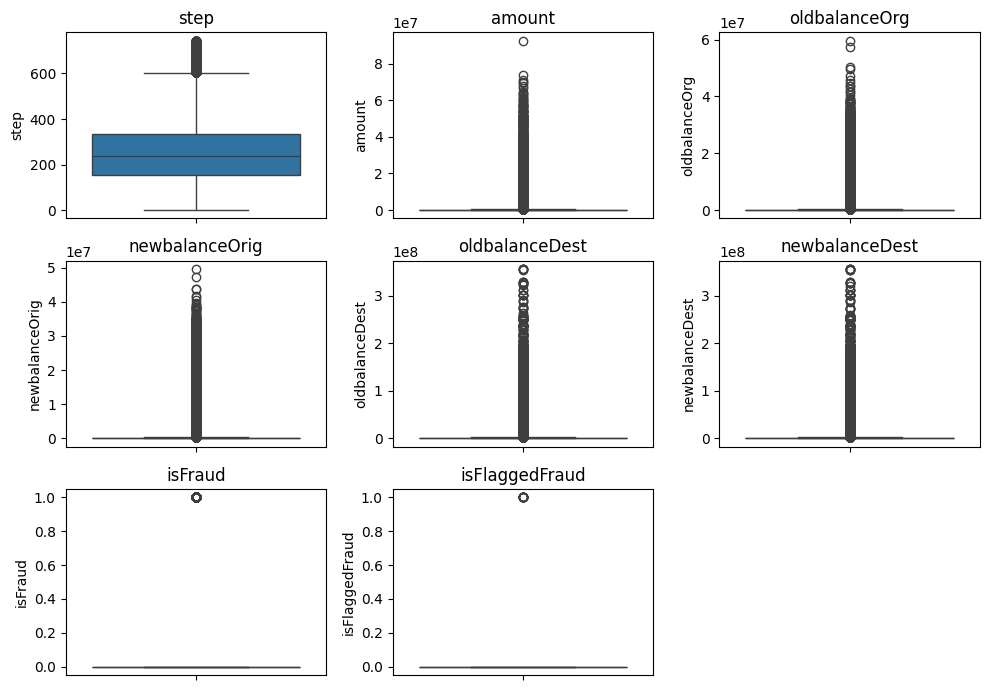

In [ ]:
# Handling Outliers & Outlier treatments

# Lets check the outliers present in numerical_columns.

plt.figure(figsize = (10,7))
for index, col in enumerate(numerical_columns):
  plt.subplot(3, 3, index+1)
  sns.boxplot( df[col]  )
  plt.title(col)
  plt.tight_layout()

- After trying to remove Outliers by IQR method, capping, and using log-transformation , still the dataset contains outliers.

- Hence rather than handling the outliers we will simply remove some columns which are highly Coreletd with the Target Variable.

- We will use machine learning algorithms like Tree based algoriths and ensemble methods and Support Vector Machine for Training the model.

### 3. Categorical Encoding

In [ ]:
categorical_columns = [ 'type', 'nameOrig' ,
                          'nameDest' , 'nameOrig_initial', 'nameDest_initial']

for col in categorical_columns:
  print(f'{col} : {df[col].nunique()}')

type : 5
nameOrig : 6353307
nameDest : 2722362
nameOrig_initial : 1
nameDest_initial : 2


In [ ]:
# Removing the categorical columns which contain maximum no. of categorical values like 'nameOrig' & 'nameDest'
df.drop(columns = ['nameOrig' ,'nameDest'], inplace = True)

In [ ]:
# Encoding the variables 'type', 'nameOrig_initial', 'nameDest_initial' using get_dummies function of the pd
df = pd.get_dummies(df, columns = ['type', 'nameOrig_initial', 'nameDest_initial'], drop_first= True, dtype= int)

### 4. Feature Scaling

In [ ]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
 df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_initial_Merchant
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,0,1,0,1
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,0,1,0,1
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,0,0,0,1,0
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,1,0,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,1,0,0,0,0
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,0,0,0,1,0
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,1,0,0,0,0
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,0,0,0,1,0


### 5. Handling Imbalanced Dataset

- The dataset contain more than 6300000 records and this dataset us also highly imbalanced.

- Training the machine learning model with such imbalanced will leads to overfitting and give results more biased towards the majority class.

- Also, there will be one major problem can arise that is exhaust of RAM or resources.

- Hence, we need to handle the class imbalance of the target variable.

- The positive class means Records with Fraud Transaction contain almost 8200 records while the negative class means legal transaction contain almost 6300000 records.

- So, we will take all the Fraudulent records and equal number of Non-Fraudulent records randomly. This final dataset will be used for model training.

In [ ]:
# Handling the Imbalanced dataset
fraudulent_records = df[df['isFraud']==1]
non_fraudulent_records = df[df['isFraud']==0]

# Taking equal number of records as fraudulent transaction
non_fraudulent_records = non_fraudulent_records.sample( fraudulent_records.shape[0], random_state  = 42)

# Concatenate the sampled subsets back together
final_df = pd.concat([fraudulent_records, non_fraudulent_records])

#  Shuffle the final sampled DataFrame
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
final_df['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [ ]:
# Free some space from RAM by deleting the variables fraudulent_records, non_fraudulent_records
del fraudulent_records, non_fraudulent_records
del categorical_columns , col, column, columns, crosstab_CC_and_CM_transaction, crosstab_with_fraud_and_isflagged, crosstab_with_margins
del numerical_columns, rows

In [ ]:
del step_transaction
del step_fraudulent_transaction

In [ ]:
# deleting the dataset df

del df

### 6. Feature Selection

In [ ]:
# Extracting the Input and target variable
target = final_df['isFraud']
input  = final_df.drop(columns = 'isFraud',axis = 1)

### 7. Train-Test-Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( input, target, test_size = 0.20, random_state = 42)

## 7. **ML Model Implementation**

**Evaluation Metrics Used -**

1. **Confusion Matrix**:
   - A confusion matrix is a table that summarizes the performance of a classification model. It presents a breakdown of the predicted classes versus the actual classes in a tabular format.
   - It consists of four main metrics:
     - True Positive (TP): Predicted positive correctly.
     - False Positive (FP): Predicted positive incorrectly.
     - True Negative (TN): Predicted negative correctly.
     - False Negative (FN): Predicted negative incorrectly.
   - The confusion matrix helps in understanding the types of errors made by the model and evaluating its performance.

2. **Accuracy Score**:
   - Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.
   - It is calculated as: \( \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} \)
   - Accuracy is useful for balanced datasets but can be misleading for imbalanced datasets.

3. **Precision Score**:
   - Precision measures the proportion of true positive predictions among the total predicted positives.
   - It is calculated as: \( \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} \)
   - Precision is important when minimizing false positives is a priority (e.g., in medical diagnosis).

4. **Recall (Sensitivity) Score**:
   - Recall measures the proportion of true positive predictions among the actual positives.
   - It is calculated as: \( \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} \)
   - Recall is important when minimizing false negatives is critical (e.g., in detecting fraud or diseases).

5. **F1 Score**:
   - F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - It is calculated as: \( F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)
   - F1 score is useful when you want to consider both false positives and false negatives equally.

6. **ROC AUC Score**:
   - ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score is used to evaluate the performance of a binary classification model.
   - It measures the area under the ROC curve, which plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
   - A higher ROC AUC score (closer to 1) indicates a better-performing model.

7. **ROC Curve**:
   - The ROC curve is a graphical plot that illustrates the performance of a binary classification model across various threshold values.
   - It is created by plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at different threshold settings.
   - The ROC curve helps in visualizing and comparing the trade-offs between sensitivity and specificity for different threshold values.


##### Common Function for Training the ML models

In [ ]:
# importing the evaluation matrix and scores
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# defing the function
model_trained_name = []
x_train_accuracy = []
x_test_accuracy = []
x_train_precision = []
x_test_precision = []
x_train_recall = []
x_test_recall = []
x_train_f1 = []
x_test_f1 = []
x_train_roc_auc = []
x_test_roc_auc = []


def model_for_binary_classification(model, model_name):

  print('-'*75)
  print(model_name)
  model_trained_name.append(model_name)
  print('-'*75)

  # training the model
  model.fit( x_train, y_train )

  # predicting for training and testing data
  y_train_prediction = model.predict( x_train )                                     # predicted values on x_train data
  y_test_prediction  = model.predict( x_test )                                       # predicting values on x_test data

  # # confusion matrix for Training data
  confusion_matrix_train = confusion_matrix( y_train, y_train_prediction )
  plt.figure(figsize=(3, 2))
  sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels for train ')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix for training data')
  plt.show()
  print('-'*75)

  # confusion matrix for testing data
  confusion_matrix_test = confusion_matrix( y_test, y_test_prediction )
  plt.figure(figsize=(3, 2))
  sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels for Test ')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix for Testing data')
  plt.show()
  print('-'*75)

  # Accuracy_score, precision_score, recall_score, f1_score, roc_auc_score for Training data
  train_accuracy = round( accuracy_score( y_train, y_train_prediction ), 2)
  train_precision= round( precision_score( y_train, y_train_prediction ))
  train_recall   = round( recall_score( y_train, y_train_prediction ), 2)
  train_f1       = round( f1_score( y_train, y_train_prediction ), 2)

  # Make predictions on test set
  y_prob_train = model.predict_proba(x_train)[:, 1]  # Predicted probabilities of positive class
  train_roc_auc  = round( roc_auc_score( y_train, y_prob_train ), 2)

  print(f'Accuracy score on x_train   : {train_accuracy}')
  print(f'Precision score on x_train  : {train_precision}')
  print(f'Recall score on x_train     : {train_recall}')
  print(f'F1 score on x_train         : {train_f1}')
  print(f'roc_auc score on x_train    : {train_roc_auc}')
  print()
  print('-'*75)

  # Plot ROC Curve for Training data
  fpr, tpr, _ = roc_curve(y_train, y_prob_train)
  plt.figure(figsize=(5, 3))
  plt.plot(fpr, tpr, label=f'AUC = {train_roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve for Training data')
  plt.legend()
  plt.show()

  # Accuracy_score, precision_score, recall_score, f1_score, roc_auc_score for Testing data
  test_accuracy = round( accuracy_score( y_test, y_test_prediction ), 2)
  test_precision= round( precision_score( y_test, y_test_prediction ), 2)
  test_recall   = round( recall_score( y_test, y_test_prediction ), 2)
  test_f1       = round( f1_score( y_test, y_test_prediction ), 2)

  # Make predictions on test set
  y_prob_test = model.predict_proba(x_test)[:, 1]  # Predicted probabilities of positive class
  test_roc_auc  = round( roc_auc_score( y_test, y_prob_test ), 2)

  print(f'Accuracy score on x_test  : {test_accuracy}')
  print(f'Precision score on x_test : {test_precision}')
  print(f'Recall score on x_test    : {test_recall}')
  print(f'F1 score on x_test        : {test_f1}')
  print(f'roc_auc score on x_test   : {test_roc_auc}')
  print()
  print('-'*75)

  # Plot ROC Curve for testing data
  fpr, tpr, _ = roc_curve(y_test, y_prob_test)
  plt.figure(figsize=(5, 3))
  plt.plot(fpr, tpr, label=f'AUC = {test_roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve for Testing data')
  plt.legend()
  plt.show()


  # appending the score into the score-list
  x_train_accuracy.append( train_accuracy )
  x_test_accuracy.append( test_accuracy )

  x_train_precision.append( train_precision )
  x_test_precision.append( test_precision )

  x_train_recall.append( train_recall )
  x_test_recall.append( test_recall )

  x_train_f1.append( train_f1 )
  x_test_f1.append( test_f1 )

  x_train_roc_auc.append( train_roc_auc )
  x_test_roc_auc.append( test_roc_auc )

  # printing Random 5 prediction
  temp = pd.DataFrame({'y_test': y_test, 'y_test_prediction':y_test_prediction})
  print(temp.head().T)

### ML Model - 1   Logistic Regression

---------------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------------


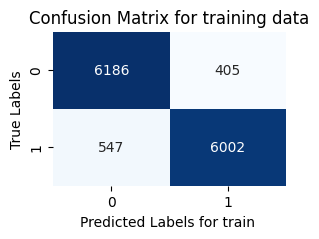

---------------------------------------------------------------------------


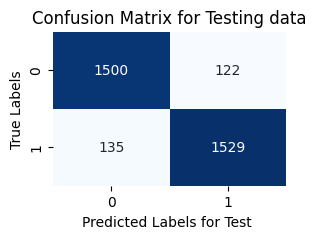

---------------------------------------------------------------------------
Accuracy score on x_train   : 0.93
Precision score on x_train  : 1
Recall score on x_train     : 0.92
F1 score on x_train         : 0.93
roc_auc score on x_train    : 0.98

---------------------------------------------------------------------------


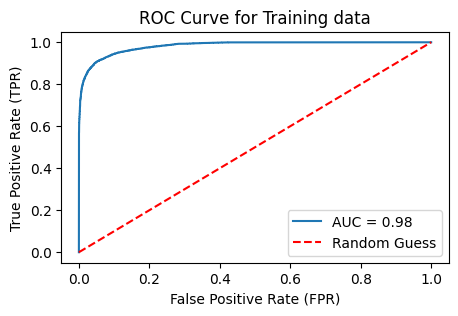

Accuracy score on x_test  : 0.92
Precision score on x_test : 0.93
Recall score on x_test    : 0.92
F1 score on x_test        : 0.92
roc_auc score on x_test   : 0.98

---------------------------------------------------------------------------


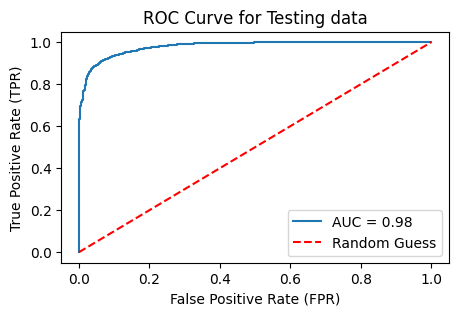

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# ML Model - 1 Implementation

from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
lr = LogisticRegression()

#  Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( lr, 'Logistic Regression')

### ML Model - 2   KNeighborsClassifier




---------------------------------------------------------------------------
KNeighborsClassifier
---------------------------------------------------------------------------


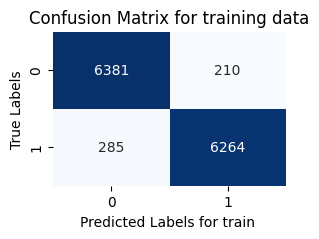

---------------------------------------------------------------------------


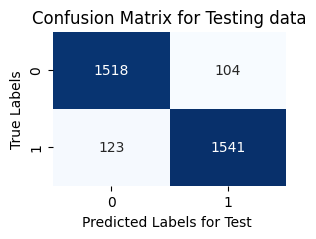

---------------------------------------------------------------------------
Accuracy score on x_train   : 0.96
Precision score on x_train  : 1
Recall score on x_train     : 0.96
F1 score on x_train         : 0.96
roc_auc score on x_train    : 1.0

---------------------------------------------------------------------------


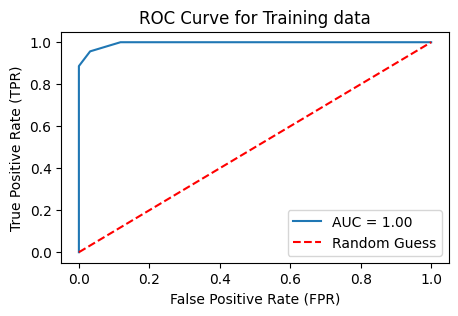

Accuracy score on x_test  : 0.93
Precision score on x_test : 0.94
Recall score on x_test    : 0.93
F1 score on x_test        : 0.93
roc_auc score on x_test   : 0.97

---------------------------------------------------------------------------


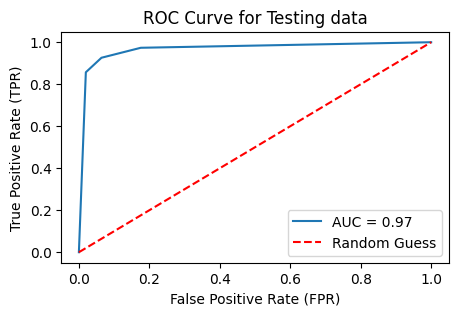

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# ML Model - 2 Implementation
from sklearn.neighbors import KNeighborsClassifier

# Fit the Algorithm
KNclassifier = KNeighborsClassifier( n_neighbors=3 )

# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( KNclassifier, 'KNeighborsClassifier')


### ML Model - 3  Support Vector Classifier

---------------------------------------------------------------------------
Support Vector Classifier
---------------------------------------------------------------------------


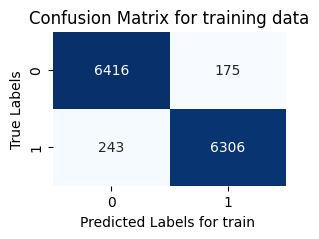

---------------------------------------------------------------------------


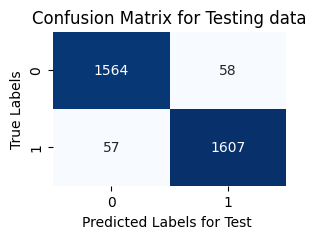

---------------------------------------------------------------------------
Accuracy score on x_train   : 0.97
Precision score on x_train  : 1
Recall score on x_train     : 0.96
F1 score on x_train         : 0.97
roc_auc score on x_train    : 1.0

---------------------------------------------------------------------------


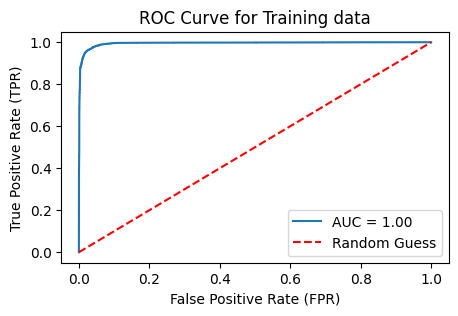

Accuracy score on x_test  : 0.97
Precision score on x_test : 0.97
Recall score on x_test    : 0.97
F1 score on x_test        : 0.97
roc_auc score on x_test   : 0.99

---------------------------------------------------------------------------


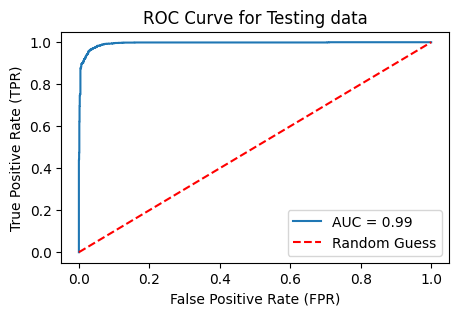

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# ML Model - 3 Implementation
# Support Vector Classifier
from sklearn.svm import SVC

# Fit the Algorithm
svc = SVC(probability=True, kernel='rbf',C=100)

# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( svc, 'Support Vector Classifier')

### ML Model - 4 Naive Bayes Classifier

---



---------------------------------------------------------------------------
Naive Bayes Classifier
---------------------------------------------------------------------------


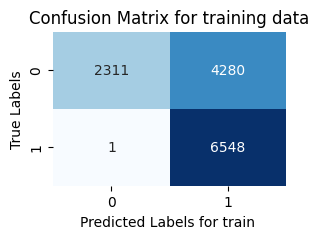

---------------------------------------------------------------------------


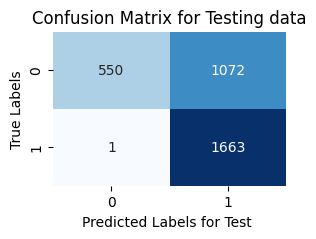

---------------------------------------------------------------------------
Accuracy score on x_train   : 0.67
Precision score on x_train  : 1
Recall score on x_train     : 1.0
F1 score on x_train         : 0.75
roc_auc score on x_train    : 0.92

---------------------------------------------------------------------------


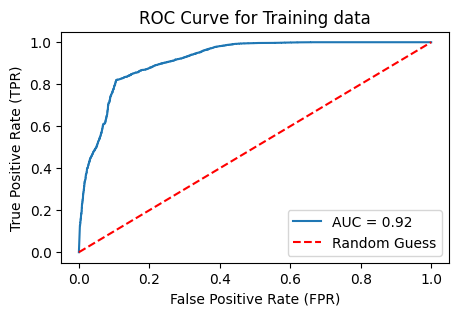

Accuracy score on x_test  : 0.67
Precision score on x_test : 0.61
Recall score on x_test    : 1.0
F1 score on x_test        : 0.76
roc_auc score on x_test   : 0.92

---------------------------------------------------------------------------


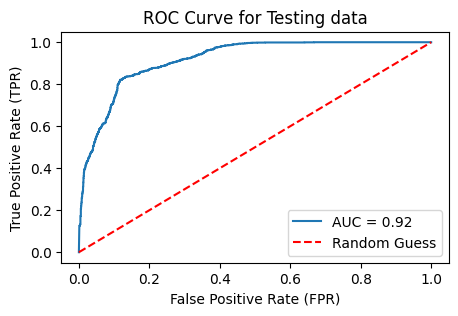

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      1      1      1      1      1


In [ ]:
# ML Model - 4 Implementation
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Fit the Algorithm
nbclassifier = GaussianNB()

# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( nbclassifier, 'Naive Bayes Classifier')


### ML Model 5 - Decision Tree Classifier

---------------------------------------------------------------------------
Decision Tree Classifier
---------------------------------------------------------------------------


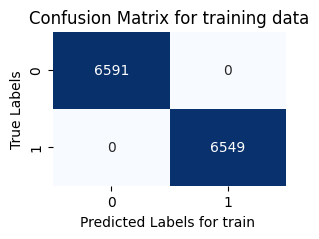

---------------------------------------------------------------------------


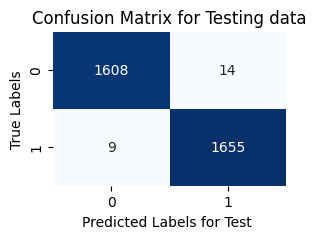

---------------------------------------------------------------------------
Accuracy score on x_train   : 1.0
Precision score on x_train  : 1
Recall score on x_train     : 1.0
F1 score on x_train         : 1.0
roc_auc score on x_train    : 1.0

---------------------------------------------------------------------------


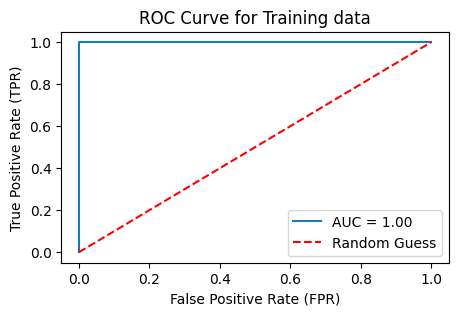

Accuracy score on x_test  : 0.99
Precision score on x_test : 0.99
Recall score on x_test    : 0.99
F1 score on x_test        : 0.99
roc_auc score on x_test   : 0.99

---------------------------------------------------------------------------


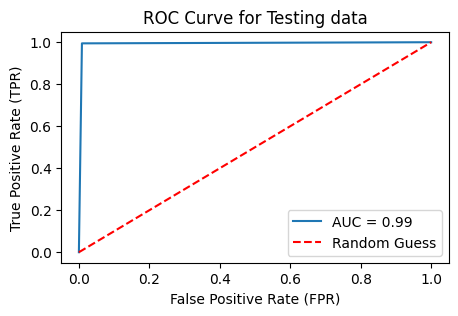

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# ML Model - 4 Implementation
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Fit the Algorithm
dt = DecisionTreeClassifier(random_state=42)

# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( dt, "Decision Tree Classifier")

### ML Model 6 - Random Forest Classifier

In [ ]:
# ML Model - 5 Implementation
# Random Forest Classifier with RandomizedSearchCV for Hyperparameter Tunning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 20),  # Random integer values between 2 and 20
    'min_samples_leaf': randint(1, 10)  # Random integer values between 1 and 10
}

# Initialize the RandomForestClassifier model
rf = RandomForestClassifier()

# Use RandomizedSearchCV to perform a random search over the parameter distribution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                     cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(input, target)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313fea1510>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313fc33d30>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
# Get the best parameters from the random search
rf_optimal_model = random_search.best_estimator_
rf_optimal_model

RandomForestClassifier(min_samples_leaf=3, min_samples_split=6,
                       n_estimators=300)

---------------------------------------------------------------------------
Random Forest Classifier with Hyperparamter Tunning
---------------------------------------------------------------------------


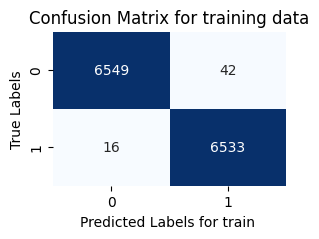

---------------------------------------------------------------------------


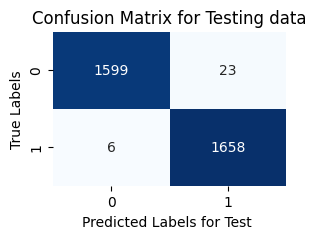

---------------------------------------------------------------------------
Accuracy score on x_train   : 1.0
Precision score on x_train  : 1
Recall score on x_train     : 1.0
F1 score on x_train         : 1.0
roc_auc score on x_train    : 1.0

---------------------------------------------------------------------------


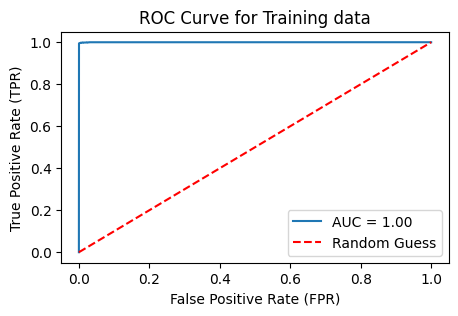

Accuracy score on x_test  : 0.99
Precision score on x_test : 0.99
Recall score on x_test    : 1.0
F1 score on x_test        : 0.99
roc_auc score on x_test   : 1.0

---------------------------------------------------------------------------


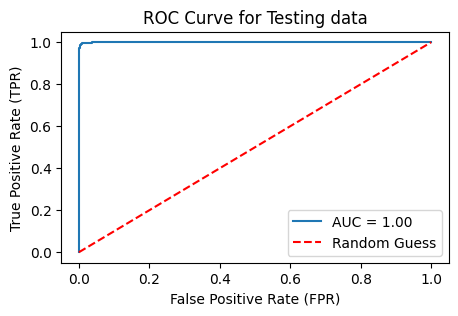

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( rf_optimal_model, 'Random Forest Classifier with Hyperparamter Tunning')

In [ ]:
# feature importance by Random forest classifier
importances = rf_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list( pd.DataFrame(input) ),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)

# Top 10 most important features
sorting_features.head()

,Feature,Feature Importance
2,oldbalanceOrg,0.283681
3,newbalanceOrig,0.168015
1,amount,0.152368
10,type_TRANSFER,0.084515
0,step,0.063901


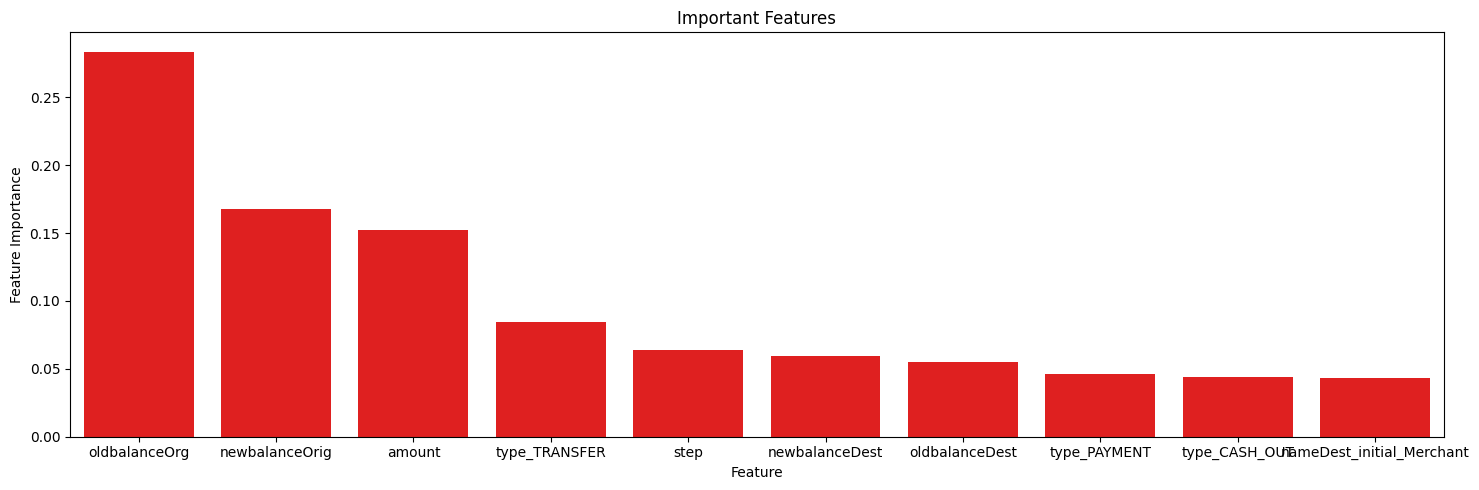

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature', y='Feature Importance', data=sorting_features.head(10), color='red')
bar.set_title('Important Features')
plt.tight_layout()
plt.show()

### ML Model 7 - Extra Trees Classifier

In [ ]:
# ML Model - 6 Implementation
#  Extra Trees Classifier with RandomizedSearchCV for Hyperparameter Tunning

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(range(5, 50, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the ExtraTreesClassifier model
et_classifier = ExtraTreesClassifier()

# Initialize RandomizedSearchCV with RandomForestClassifier, parameter grid, and F1-score as scoring metric
random_search = RandomizedSearchCV(estimator=et_classifier, param_distributions=param_dist,
                                   scoring=f1_score, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit( input, target )

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313f15bb20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313ef9f670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313f11dff0>},
                   random_state=42,
                   scoring=<function f1_score at 0x793097560280>, verbose=2)

In [ ]:
# Get the best parameters from the grid search
et_optimal_model = random_search.best_estimator_
et_optimal_model

ExtraTreesClassifier(max_depth=30, min_samples_leaf=15, min_samples_split=12,
                     n_estimators=171)

---------------------------------------------------------------------------
Extra Trees Classifier with Hyperparamter Tunning
---------------------------------------------------------------------------


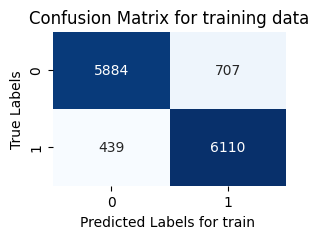

---------------------------------------------------------------------------


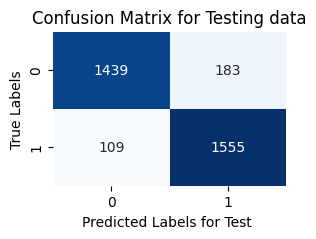

---------------------------------------------------------------------------
Accuracy score on x_train   : 0.91
Precision score on x_train  : 1
Recall score on x_train     : 0.93
F1 score on x_train         : 0.91
roc_auc score on x_train    : 0.97

---------------------------------------------------------------------------


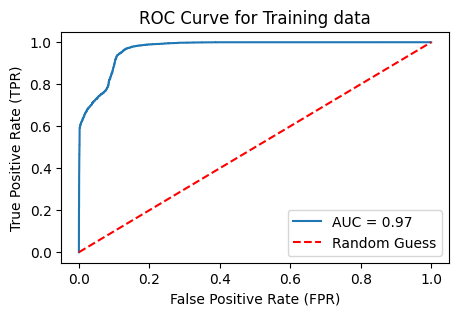

Accuracy score on x_test  : 0.91
Precision score on x_test : 0.89
Recall score on x_test    : 0.93
F1 score on x_test        : 0.91
roc_auc score on x_test   : 0.97

---------------------------------------------------------------------------


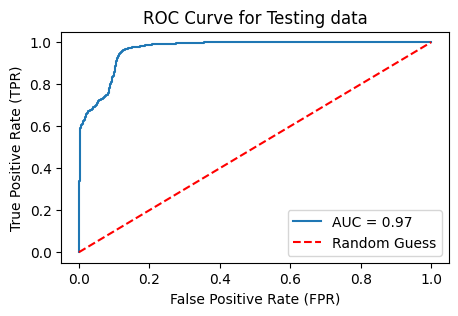

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( et_optimal_model, 'Extra Trees Classifier with Hyperparamter Tunning')

In [ ]:
# feature importance by Gradient Boosting classifier
importances = et_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list( pd.DataFrame(input) ),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)

# top 10 Importatnt features
sorting_features.head(10)

,Feature,Feature Importance
10,type_TRANSFER,0.261645
11,nameDest_initial_Merchant,0.182451
9,type_PAYMENT,0.179005
7,type_CASH_OUT,0.113563
0,step,0.085417
1,amount,0.069310
2,oldbalanceOrg,0.061317
3,newbalanceOrig,0.018897
5,newbalanceDest,0.011110
8,type_DEBIT,0.008897


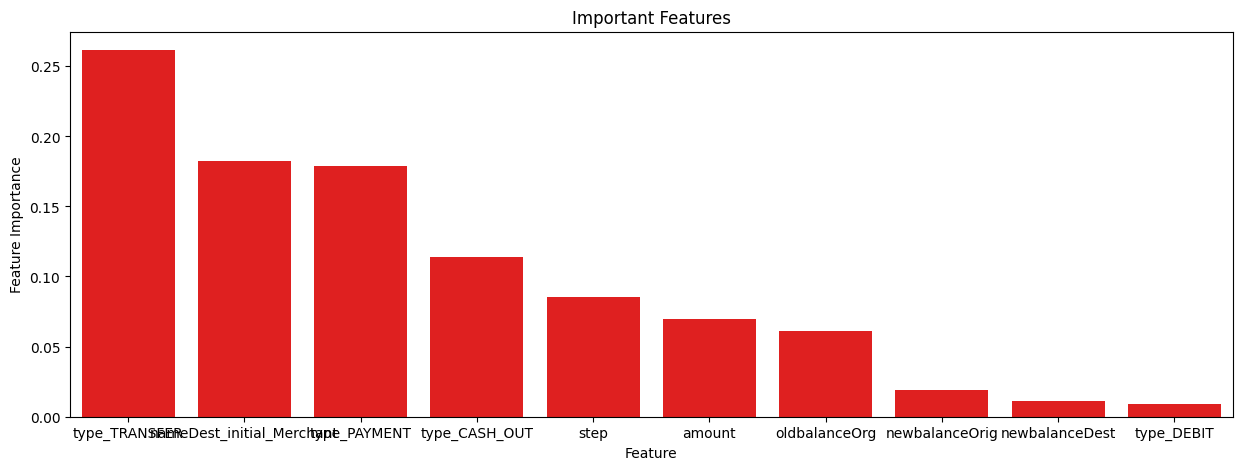

In [ ]:
# plotting top 10 feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature', y='Feature Importance' , data=sorting_features.head(10), color='red')
bar.set_title('Important Features')
plt.show()

### ML Model 8 - Gradient Boosting Classifier

In [ ]:
# ML Model - 7 Implementation
#  Gradient Boosting Classifier with RandomizedSearchCV for Hyperparameter Tunning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [300,400,500],
    'max_depth': [3, 5, 7]
}

# Initialize the GradientBoostingClassifier model
gbclassifier = GradientBoostingClassifier()

# Use RandomizedSearchCV to perform a Randomized search over the parameter grid
random_search = RandomizedSearchCV( estimator=gbclassifier, param_distributions=param_dist,
                                     cv=3, scoring=f1_score,
                                   verbose=2, n_jobs=-1, random_state=42 )

# Fit the model to the training data
random_search.fit( input, target )

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [300, 400, 500]},
                   random_state=42,
                   scoring=<function f1_score at 0x793097560280>, verbose=2)

In [ ]:
# Get the best parameters from the grid search
gbc_optimal_model = random_search.best_estimator_
gbc_optimal_model

GradientBoostingClassifier(n_estimators=300)

---------------------------------------------------------------------------
Gradient Boosting Classifier with Hyperparamter Tunning
---------------------------------------------------------------------------


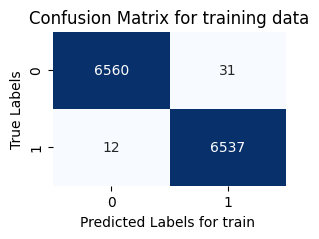

---------------------------------------------------------------------------


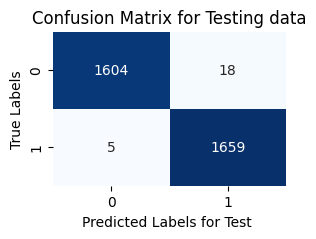

---------------------------------------------------------------------------
Accuracy score on x_train   : 1.0
Precision score on x_train  : 1
Recall score on x_train     : 1.0
F1 score on x_train         : 1.0
roc_auc score on x_train    : 1.0

---------------------------------------------------------------------------


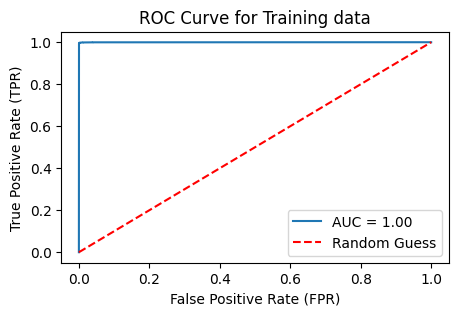

Accuracy score on x_test  : 0.99
Precision score on x_test : 0.99
Recall score on x_test    : 1.0
F1 score on x_test        : 0.99
roc_auc score on x_test   : 1.0

---------------------------------------------------------------------------


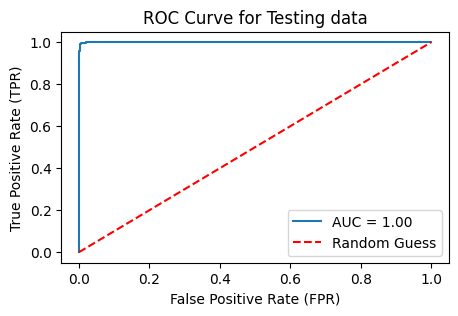

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( gbc_optimal_model, 'Gradient Boosting Classifier with Hyperparamter Tunning')

In [ ]:
# feature importance by Gradient Boosting classifier
importances = gbc_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list( pd.DataFrame(input) ),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
3,newbalanceOrig,0.392719
2,oldbalanceOrg,0.366205
1,amount,0.091571
9,type_PAYMENT,0.052025
5,newbalanceDest,0.030127
10,type_TRANSFER,0.026883
0,step,0.020672
11,nameDest_initial_Merchant,0.014233
7,type_CASH_OUT,0.002948
4,oldbalanceDest,0.002217


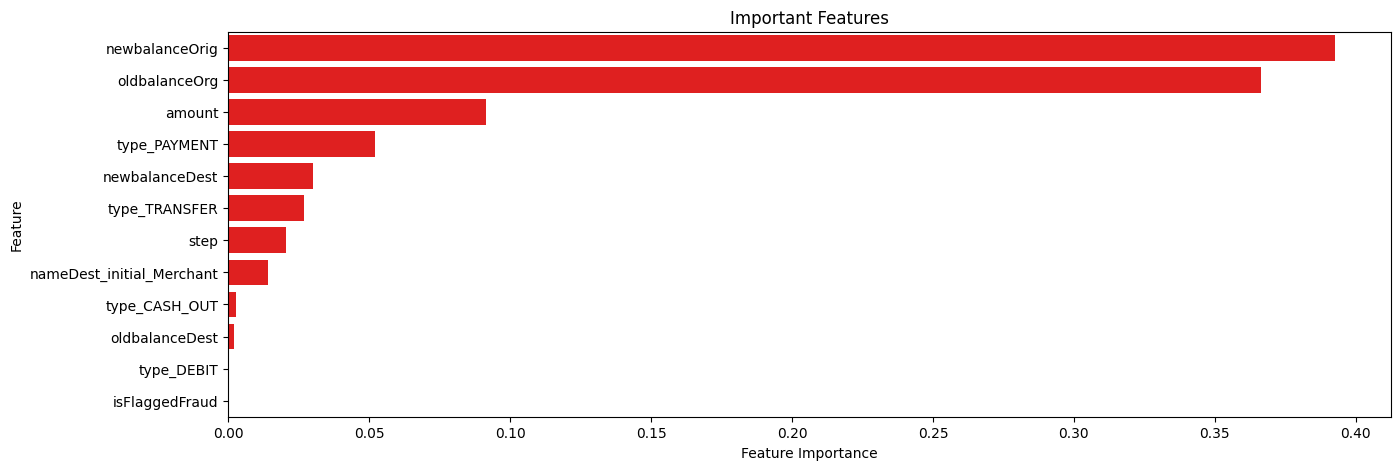

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='red')
bar.set_title('Important Features')
plt.show()

### ML Model 9 - XGBoost Classifier

In [ ]:
# ML Model - 7 Implementation
# XGBoost Classifier

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the XGBClassifier model
xgbclassifier = XGBClassifier()

# Use RandomizedSearchCV to perform a Randomized search over the parameter grid
random_search = RandomizedSearchCV(estimator=xgbclassifier, param_distributions=param_dist,
                                     scoring= f1_score , cv=5, verbose=2,
                                   random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit( input, target )

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313ea058a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313ea04a90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79313ec6cee0>},
                   random_state=42,
                   scoring=<function f1_score at 0x793097560280>, verbose=2)

In [ ]:
# Get the best parameters from the grid search
xgbc_optimal_model = random_search.best_estimator_
xgbc_optimal_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, min_samples_leaf=15, min_samples_split=12,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=171, n_jobs=None, ...)

---------------------------------------------------------------------------
XGBoost Classifier with Hyperparamter Tunning
---------------------------------------------------------------------------


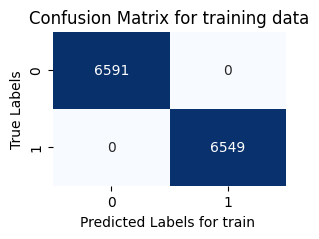

---------------------------------------------------------------------------


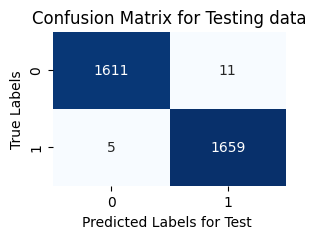

---------------------------------------------------------------------------
Accuracy score on x_train   : 1.0
Precision score on x_train  : 1
Recall score on x_train     : 1.0
F1 score on x_train         : 1.0
roc_auc score on x_train    : 1.0

---------------------------------------------------------------------------


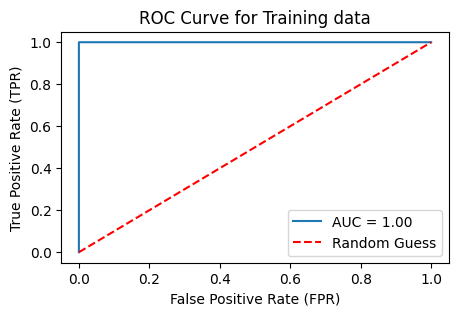

Accuracy score on x_test  : 1.0
Precision score on x_test : 0.99
Recall score on x_test    : 1.0
F1 score on x_test        : 1.0
roc_auc score on x_test   : 1.0

---------------------------------------------------------------------------


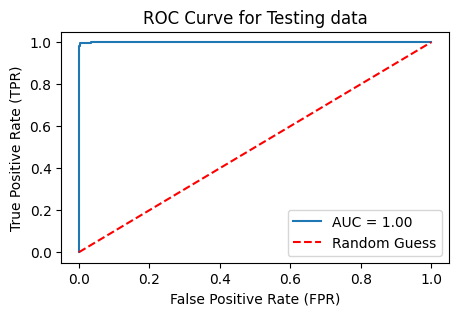

                   13724  12284  1163   6057   6492 
y_test                 0      1      0      0      0
y_test_prediction      0      1      0      0      0


In [ ]:
# Predict on the model & Visualizing evaluation Metric Score chart
model_for_binary_classification( xgbc_optimal_model, 'XGBoost Classifier with Hyperparamter Tunning')

In [ ]:
# feature importance by XGBoost classifier
importances = xgbc_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list( pd.DataFrame(input) ),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)

# Printing top 10 important features
sorting_features.head(10)

,Feature,Feature Importance
3,newbalanceOrig,0.556693
9,type_PAYMENT,0.207689
10,type_TRANSFER,0.077558
2,oldbalanceOrg,0.070984
7,type_CASH_OUT,0.032823
1,amount,0.028500
5,newbalanceDest,0.018809
0,step,0.004763
4,oldbalanceDest,0.002181
6,isFlaggedFraud,0.000000


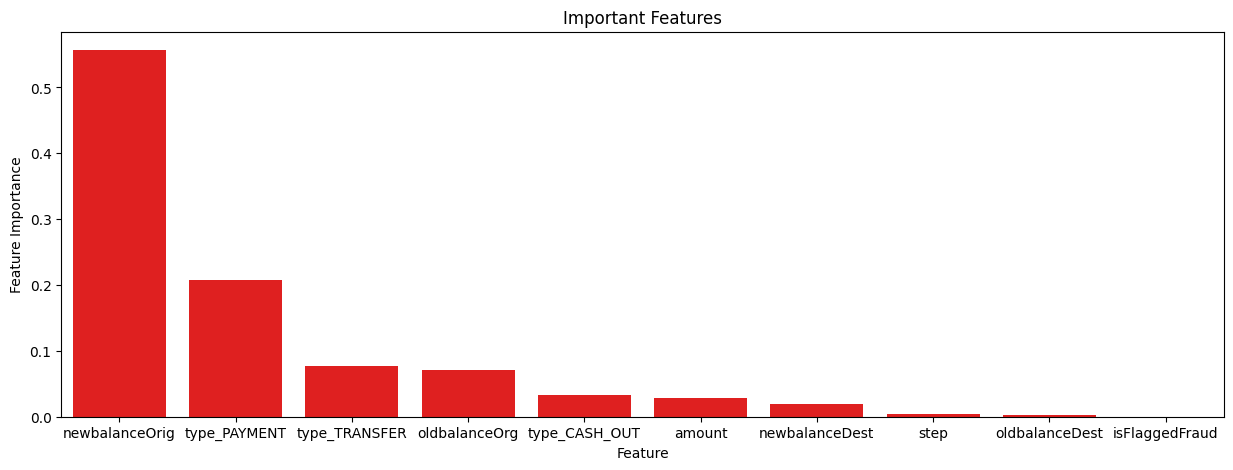

In [ ]:
# plotting top 10 feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature', y='Feature Importance',  data=sorting_features.head(10), color='red')
bar.set_title('Important Features')
plt.show()

- RandomizedSearchCV is a method for hyperparameter tuning that efficiently explores a wide range of hyperparameter values by randomly sampling from specified distributions.


- It reduces the computational cost compared to GridSearchCV by focusing on a subset of the hyperparameter space.

- It is more effective in finding good hyperparameter values, especially in high-dimensional or large search spaces.

### Evaluation Score Dataframe

In [ ]:

model_trained_name

['Logistic Regression',
 'KNeighborsClassifier',
 'Support Vector Classifier',
 'Naive Bayes Classifier',
 'Decision Tree Classifier',
 'Random Forest Classifier with Hyperparamter Tunning',
 'Extra Trees Classifier with Hyperparamter Tunning',
 'Gradient Boosting Classifier with Hyperparamter Tunning',
 'XGBoost Classifier with Hyperparamter Tunning']

In [ ]:
# Creating the dataframe of the scores
result_df_binary_countvec = pd.DataFrame({'Model' : model_trained_name,
                          'Training Accuracy':x_train_accuracy,
                          'Testing Accuracy': x_test_accuracy,
                          'Training Precision':x_train_precision ,
                          'Testing Precision' : x_test_precision,
                          'Training Recall' : x_train_recall,
                          'Testing Recall' : x_test_recall,
                          'Training F1 Score': x_train_f1,
                          'Testing F1 Score': x_test_f1,
                          'Training roc_auc Score' : x_train_roc_auc,
                          'Testing roc_auc score' : x_test_roc_auc})

In [ ]:
# sorting the values by test R2 score
result_df_binary_countvec.sort_values(by=['Testing roc_auc score','Testing F1 Score'], ascending=False)

,Model,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1 Score,Testing F1 Score,Training roc_auc Score,Testing roc_auc score
8,XGBoost Classifier with Hyperparamter Tunning,1.00,1.00,1,0.99,1.00,1.00,1.00,1.00,1.00,1.00
5,Random Forest Classifier with Hyperparamter Tu...,1.00,0.99,1,0.99,1.00,1.00,1.00,0.99,1.00,1.00
7,Gradient Boosting Classifier with Hyperparamte...,1.00,0.99,1,0.99,1.00,1.00,1.00,0.99,1.00,1.00
4,Decision Tree Classifier,1.00,0.99,1,0.99,1.00,0.99,1.00,0.99,1.00,0.99
2,Support Vector Classifier,0.97,0.97,1,0.97,0.96,0.97,0.97,0.97,1.00,0.99
0,Logistic Regression,0.93,0.92,1,0.93,0.92,0.92,0.93,0.92,0.98,0.98
1,KNeighborsClassifier,0.96,0.93,1,0.94,0.96,0.93,0.96,0.93,1.00,0.97
6,Extra Trees Classifier with Hyperparamter Tunning,0.91,0.91,1,0.89,0.93,0.93,0.91,0.91,0.97,0.97
3,Naive Bayes Classifier,0.67,0.67,1,0.61,1.00,1.00,0.75,0.76,0.92,0.92


###### Vizualizing the **Accuracy Score** for the Training and Testing Data  

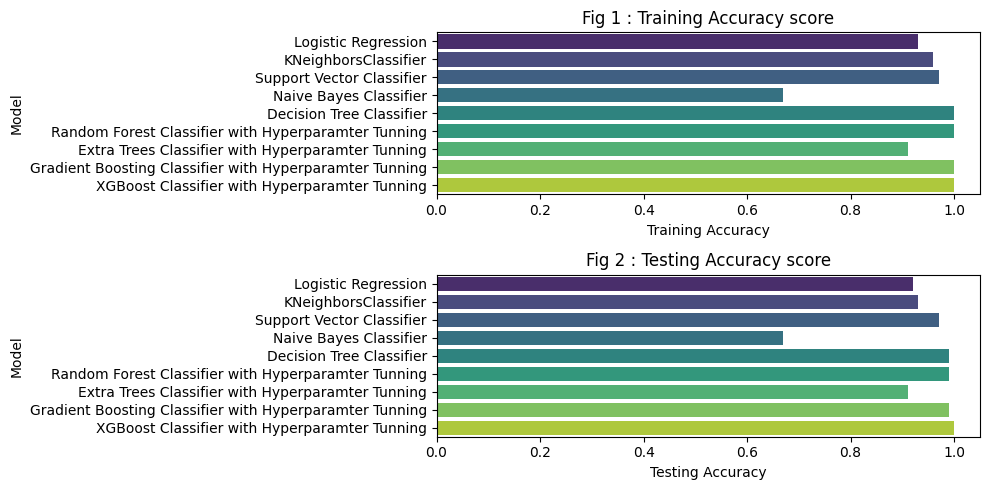

In [ ]:
# Vizualizing the Accuracy Score for the Training and Testing Data
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.barplot(y=result_df_binary_countvec['Model'], x=result_df_binary_countvec['Training Accuracy'], palette='viridis')  # Use sns.barplot with x and y parameters
plt.title('Fig 1 : Training Accuracy score')  # Set the title of the plot


plt.subplot(2,1,2)
sns.barplot(y=result_df_binary_countvec['Model'], x=result_df_binary_countvec['Testing Accuracy'], palette='viridis')  # Use sns.barplot with x and y parameters
plt.title('Fig 2 : Testing Accuracy score')  # Set the title of the plot
plt.tight_layout()

 - Here, We can observe than there is less difference between the training and testing **Accuracy score** of  **'Decision Tree Classifier'**, **'Random Forest Classifier with Hyperparamter Tunning'** , **'Gradient Boosting Classifier with Hyperparamter Tunning'** & **'XGBoost Classifier with Hyperparamter Tunning'** as compared with the rest of models.



##### Vizualizing the **F1 Score score** for the Training and Testing Data


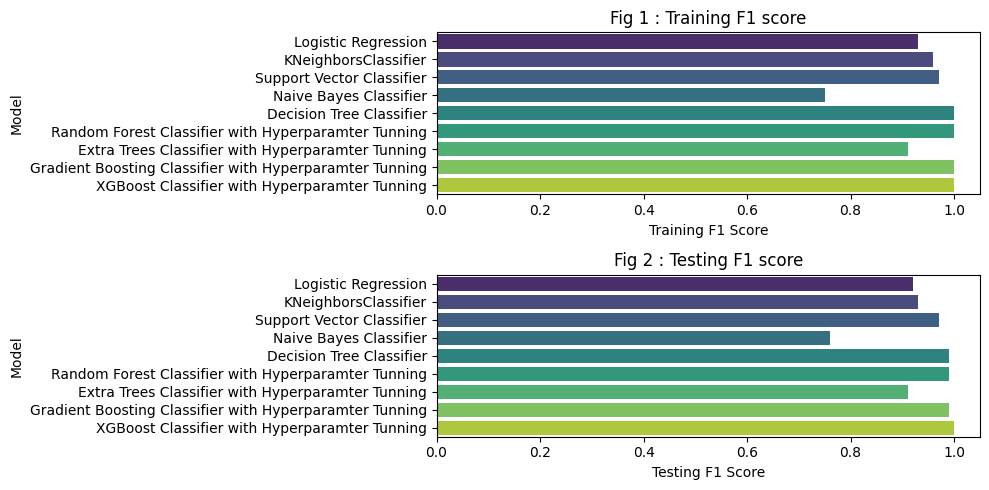

In [ ]:
# Vizualizing the F1 Score score for the Training and Testing Data
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.barplot(y=result_df_binary_countvec['Model'], x=result_df_binary_countvec['Training F1 Score'], palette='viridis')  # Use sns.barplot with x and y parameters
plt.title('Fig 1 : Training F1 score')  # Set the title of the plot


plt.subplot(2,1,2)
sns.barplot(y=result_df_binary_countvec['Model'], x=result_df_binary_countvec['Testing F1 Score'], palette='viridis')  # Use sns.barplot with x and y parameters
plt.title('Fig 2 : Testing F1 score')  # Set the title of the plot
plt.tight_layout()

 - Here, We can observe than there is less difference between the training and testing **F1 score**  of **'Decision Tree Classifier'**, **'Random Forest Classifier with Hyperparamter Tunning'** , **'Gradient Boosting Classifier with Hyperparamter Tunning'** & **'XGBoost Classifier with Hyperparamter Tunning'** as compared with the rest of models.


##### Vizualizing the **roc_auc score** for the Training and Testing Data


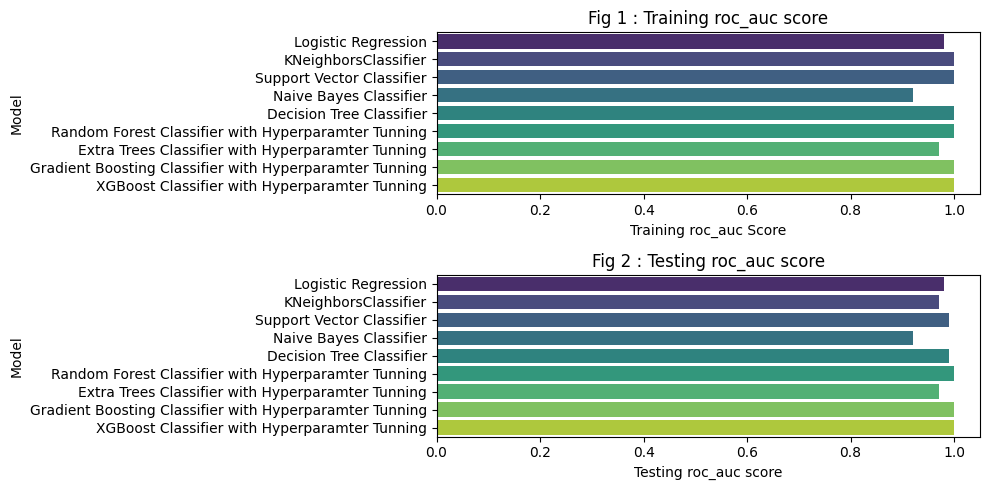

In [ ]:
# Vizualizing the roc_auc score for the Training and Testing Data
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.barplot(y=result_df_binary_countvec['Model'], x=result_df_binary_countvec['Training roc_auc Score'], palette='viridis')  # Use sns.barplot with x and y parameters
plt.title('Fig 1 : Training roc_auc score')  # Set the title of the plot


plt.subplot(2,1,2)
sns.barplot(y=result_df_binary_countvec['Model'], x=result_df_binary_countvec['Testing roc_auc score'], palette='viridis')  # Use sns.barplot with x and y parameters
plt.title('Fig 2 : Testing roc_auc score')  # Set the title of the plot
plt.tight_layout()

- Here, We can observe than there is less difference between the training and testing **roc_auc score** of **'Decision Tree Classifier'**, **'Random Forest Classifier with Hyperparamter Tunning'** , **'Gradient Boosting Classifier with Hyperparamter Tunning'** & **'XGBoost Classifier with Hyperparamter Tunning'** as compared with the rest of models.


# **We can observe that, tree based ML model works very well as compared with the rest of the models.**

- The reason is behind this is while preprocessing of data before training, the outliers where present in almost all the variable with numerical values.

- Even after trying to handle the outliers, all the outliers can not be removed. If done so, then it will lead to loss of records or information from the minority class of target variable.

- The tree based algorithm are robust to the outliers and hence they stand out as compared with the rest of ML models.

###  **Evaluation metrics I considered for a positive business impact and its reason**

I used ROC AUC. Because using ROC AUC as  evaluation metric is appropriate for assessing the overall performance of a binary classification model, especially in scenarios where class distribution is balanced.

 It provides insights into the model's ability to distinguish between positive and negative classes across varying decision thresholds, making it a valuable metric for model evaluation and comparison.



###  **ML model which I  choosed from the above created models as my final prediction model and its reason**

- If we consider **Accuracy Score** , **F1 score** &  **roc-auc score** then **'Decision Tree Classifier'**, **'Random Forest Classifier with Hyperparamter Tunning'** , **'Gradient Boosting Classifier with Hyperparamter Tunning'** & **'XGBoost Classifier with Hyperparamter Tunning'**  are more better results when compared with the rest of models.

- Again, as compared with this **'Decision Tree Classifier'**, **'Random Forest Classifier with Hyperparamter Tunning'** , **'Gradient Boosting Classifier with Hyperparamter Tunning'** & **'XGBoost Classifier with Hyperparamter Tunning'** 4 models , **'XGBoost Classifier'** is giving same score i.e. **1** for both training as well as testing data.

- Hence, **'XGBoost Classifier'** will be considered for final prediction model.

### **The model which I have used and the  important feature**

- **'XGBoost Classifier'** model outstand with in comparision with the other model. Hence it will be considered for final prediction Model.


- **newbalanceOrig** , **type_PAYMENT**, **type_TRANSFER** , **oldbalanceOrg**
 , **type_CASH_OUT** & **amount** ,this are some of the important features.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle


# Specifying the file path where you want to save the model
filename = 'trained_model.pkl'

# Save the model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(xgbc_optimal_model, file)

print(f"Model saved to '{filename}'")

Model saved to 'trained_model.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

filename = trained_model.pkl

with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
predictions = loaded_model.predict(x_test)
